# **종합실습1 이변량분석(y-숫자) : car seat 매출 분석**

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [3]:
target = 'Sales'

## **2.숫자형 X --> Y**

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### **(1) Advertising -> Sales**

1) 시각화 : scatter(regplot), jointplot

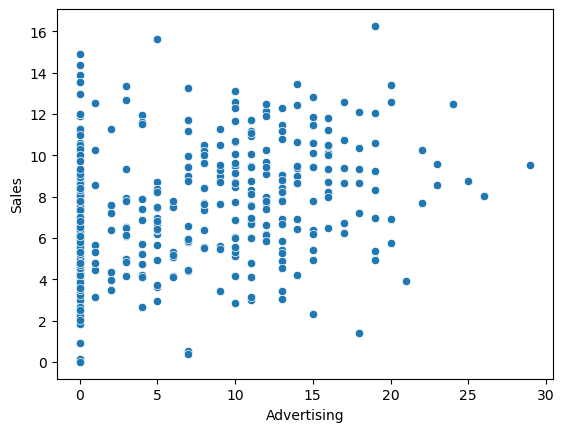

In [14]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

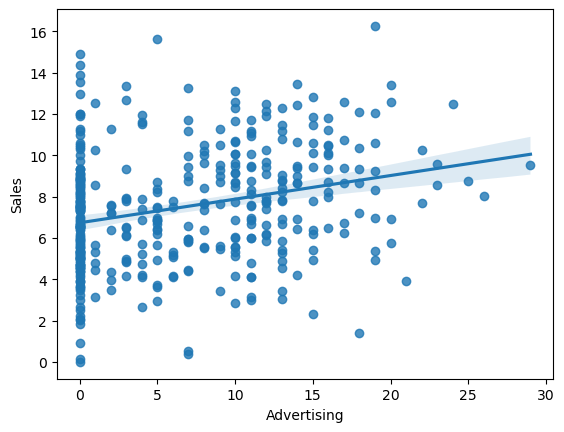

In [15]:
sns.regplot(x=var, y = target, data = data)
plt.show()

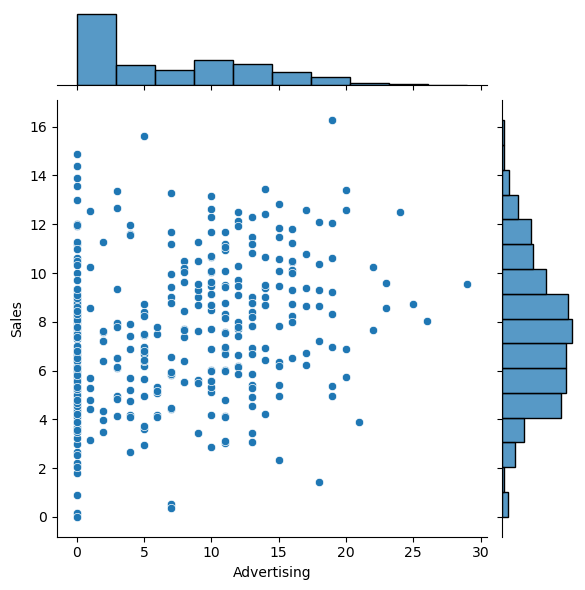

In [16]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [17]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

* 추가 : 광고비 0 빼고 분석해보기

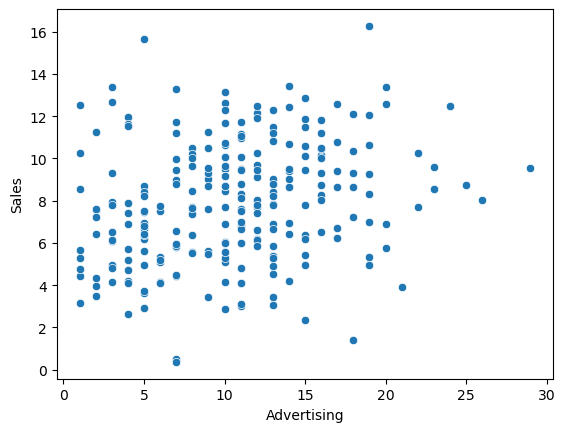

In [18]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [19]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.112672883086058e-05


### **(2) Population -> Sales**

1) 시각화 : scatter(regplot), jointplot

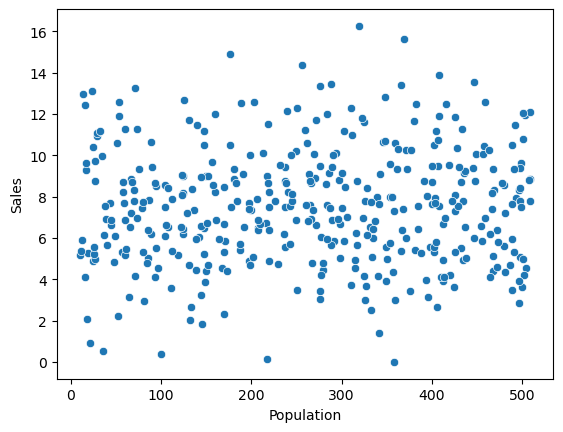

In [7]:
var = 'Population'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

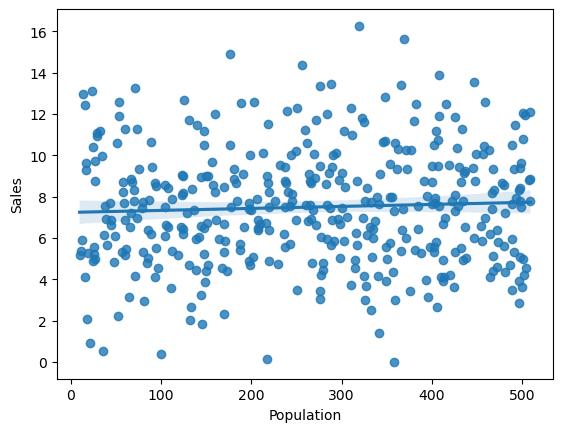

In [8]:
sns.regplot(x=var, y = target, data = data)
plt.show()

In [34]:
# 대체적으로 인구에 따른 판매량이 고르게 분포되어 있음
# 인구와 판매량는 서로 크게 관계가 없음
# 대체적으로 판매량은 6~8에 몰려있음

2) 수치화 : 상관분석

In [9]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.0504709844720392, p-value : 0.31398160931904856


In [44]:
# p-value가 0에 가깝지 않은 것으로 보아 인구와 판매량은 크게 관련 없음
# 추가적으로 인구 구성을 확인해야함!!

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(3) Price -> Sales**

1) 시각화 : scatter(regplot), jointplot

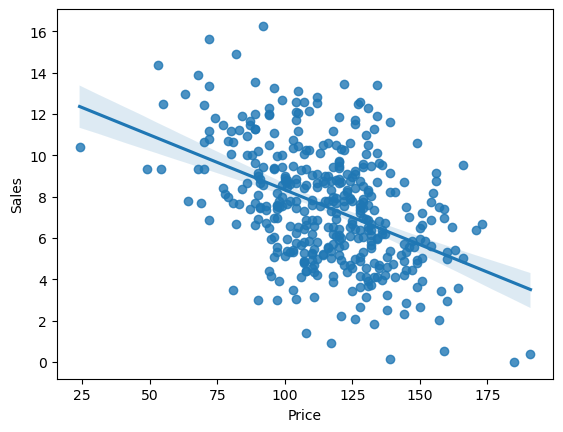

In [21]:
var = 'Price'

sns.regplot(x=var, y = target, data = data)
plt.show()

In [23]:
# 75~150 사이에 판매량이 몰려 있음
# 대체적으로 가격이 높아질 수록, 판매량 감소
# 몰려 있기는 하지만, 서로 관계가 그렇게 크지는 않음

2) 수치화 : 상관분석

In [22]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4449507278465726, p-value : 7.618187011913169e-21


In [37]:
# 대체로 가격과 판매량은 강한 상관관계를 가짐
# 가격이 높을 수록 판매가가 감소 -> 가격을 적정선으로 조정??

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(4) Age -> Sales**

1) 시각화 : scatter(regplot), jointplot

상관계수 : -0.2318154396045765, p-value : 2.7889498393714038e-06


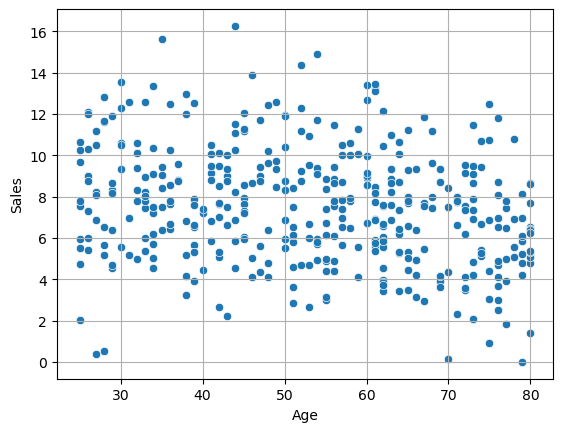

In [45]:
eda_2_nn('Age', target, data)

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(5) CompPrice -> Sales**

1) 시각화 : scatter(regplot), jointplot

In [30]:
def eda_2_nn(var, target, data): 
    result = spst.pearsonr(data[var], data[target]) 
    print(f'상관계수 : {result[0]}, p-value : {result[1]}') 
    sns.scatterplot(x=var, y = target, data = data) 
    plt.grid() 
    plt.show()

상관계수 : 0.06407872955062152, p-value : 0.2009398289418404


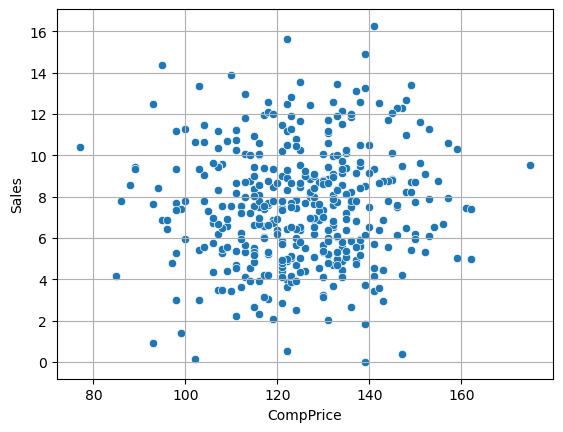

In [32]:
eda_2_nn('CompPrice', target, data)

In [38]:
# 경쟁사가 위치한 대다수 지역은 100~140의 가격을 갖는 카시트가 6~8만큼 팔림
# 자사보다 몰림이 크지 않음 -> 왤까?? -> 

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [41]:
# 타사와 비교를 위해 추가
data['Price_Diff'] = data['CompPrice'] - data['Price']
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US,Price_Diff
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,Yes,No,13


상관계수 : 0.5979217124533921, p-value : 3.877120641788767e-40


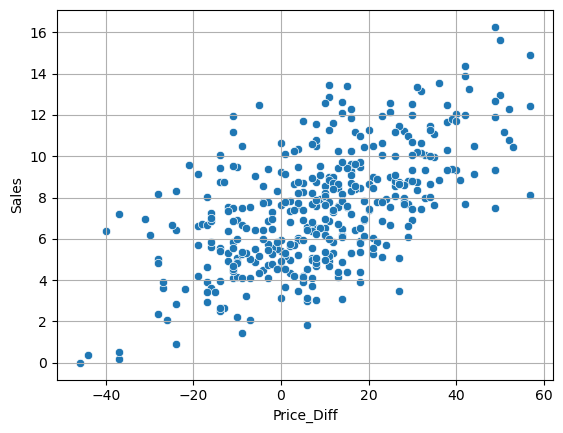

In [43]:
var = 'Price_Diff'
eda_2_nn(var, target, data)
# price: -0.44
# compprice: 0.05

### **(6) Income -> Sales**

1) 시각화 : scatter(regplot), jointplot

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517904


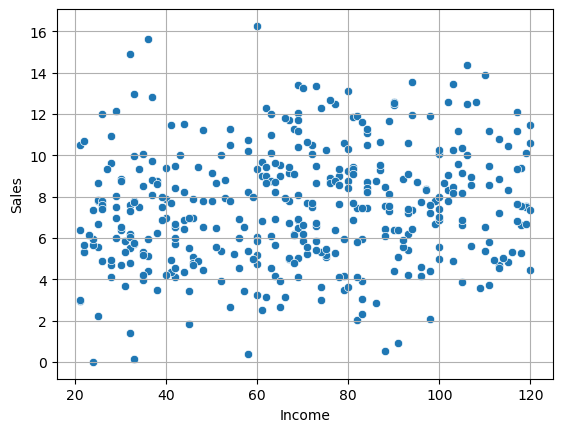

In [39]:
var = 'Income'

eda_2_nn(var, target, data)

In [40]:
# 75~150에 판매량이 몰려있으며, 그 판매량 역시 중간 정도의 판매량이므로 수입이 어딘가에 몰려있지 않음
# 그러다보니 고르게 분포되어 있는 것 같음.
# 대체적으로 고르게 분포, 중간 이상의 상관관계를 가질 것으로 예상

2) 수치화 : 상관분석

In [26]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517904


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## **3.범주형 X --> Y**

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**

1) 시각화 : 평균비교 barplot

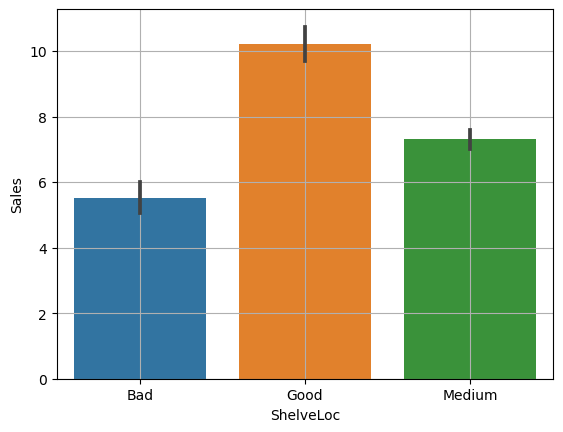

In [4]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [5]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(2) Urban -> Sales**

1) 시각화 : 평균비교 barplot

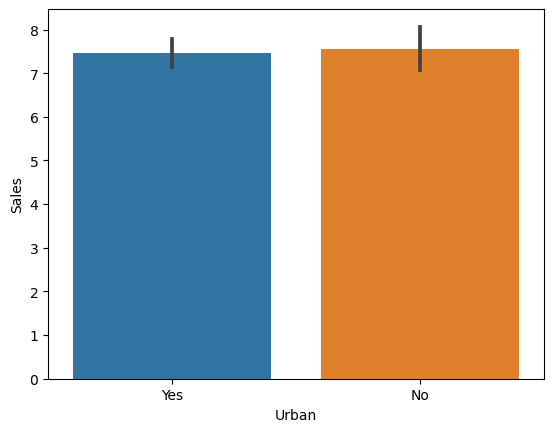

In [19]:
var = 'Urban'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [20]:
yes = data.loc[data[var] == 'Yes', target]
no = data.loc[data[var] == 'No', target]

spst.ttest_ind(yes, no)

TtestResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [16]:
# 평균의 차이가 있긴 하지만, 차이가 크지 않고 t통계량도 -2에 가깝지 않으므로 관련 없음
# 신뢰구간이 겹침 => 평균의 차이가 거의 없음

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

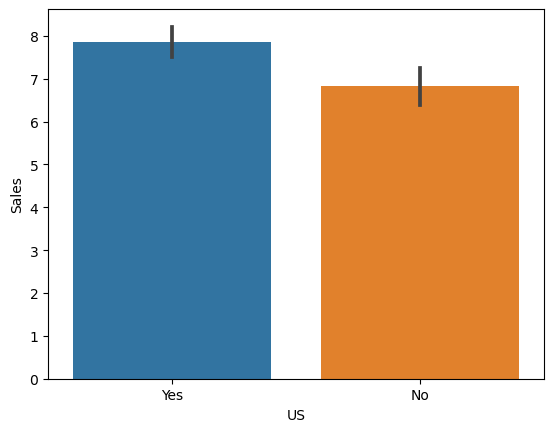

In [21]:
var = 'US'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [23]:
yes = data.loc[data[var] == 'Yes', target]
no = data.loc[data[var] == 'No', target]

spst.ttest_ind(yes, no)

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [26]:
# pvalue < 0.05 이므로, sales와 us는 관련있음
# ttest 역시 2보다 크기 때문에 관련 있음

## **4.관계 정리하기**

① 강한관계

In [ ]:
# Price_Diff, Shelvloc

② 중간관계

In [ ]:
# Price, Income, Age, US, Advertising

③ 관계없음

In [ ]:
# Population, CompPrice, Urban